In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [147]:
df = pd.read_csv('housing.csv')

In [148]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [149]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [150]:
df.shape

(20640, 10)

In [151]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [152]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: >

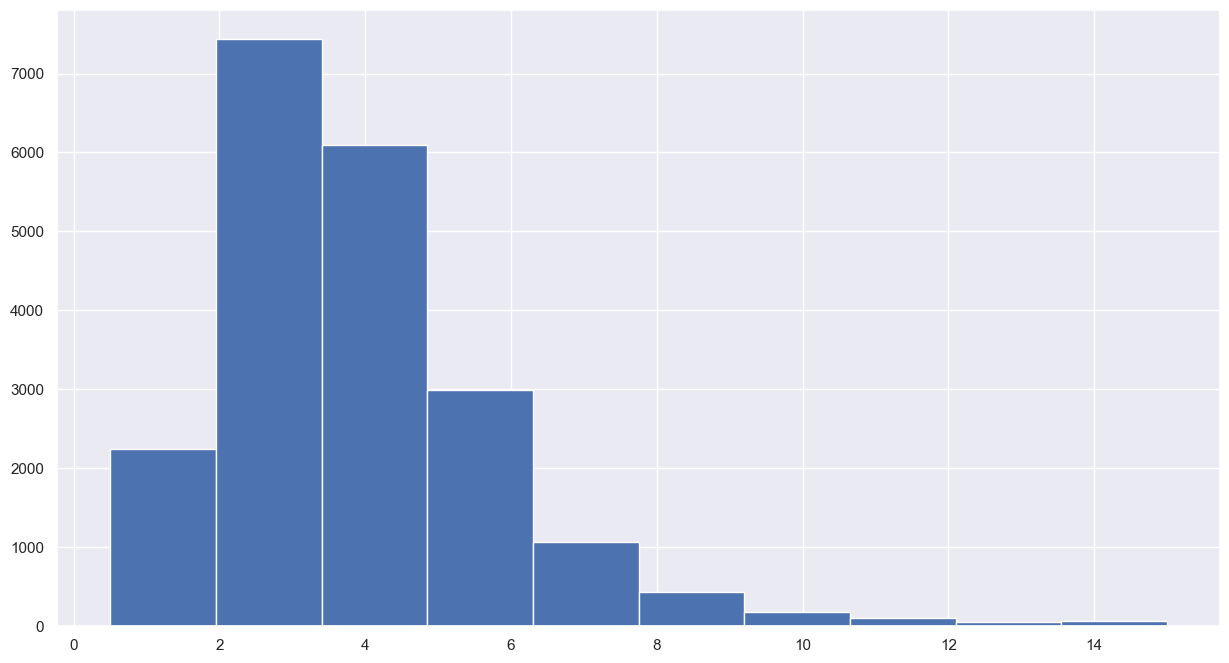

In [153]:
df['median_income'].hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

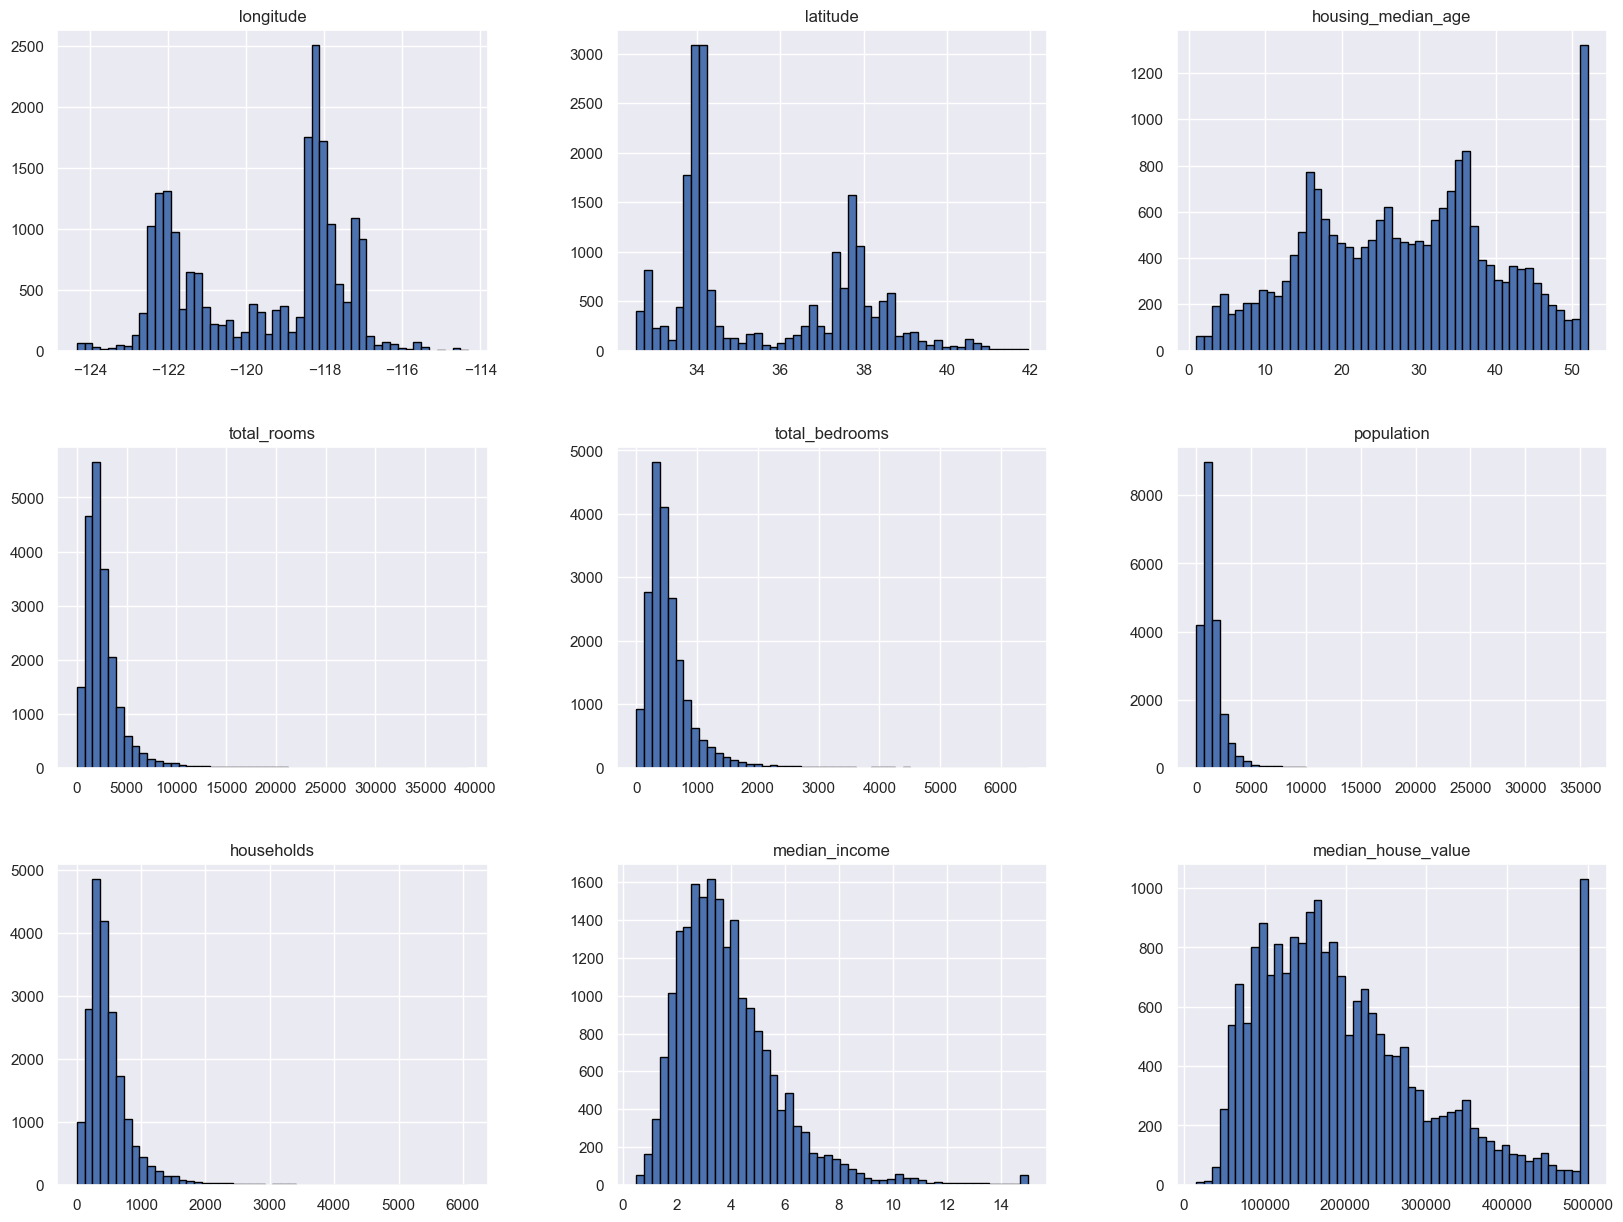

In [154]:
df.hist(bins=50, figsize=(20,15), ec='black')

<Axes: xlabel='longitude', ylabel='latitude'>

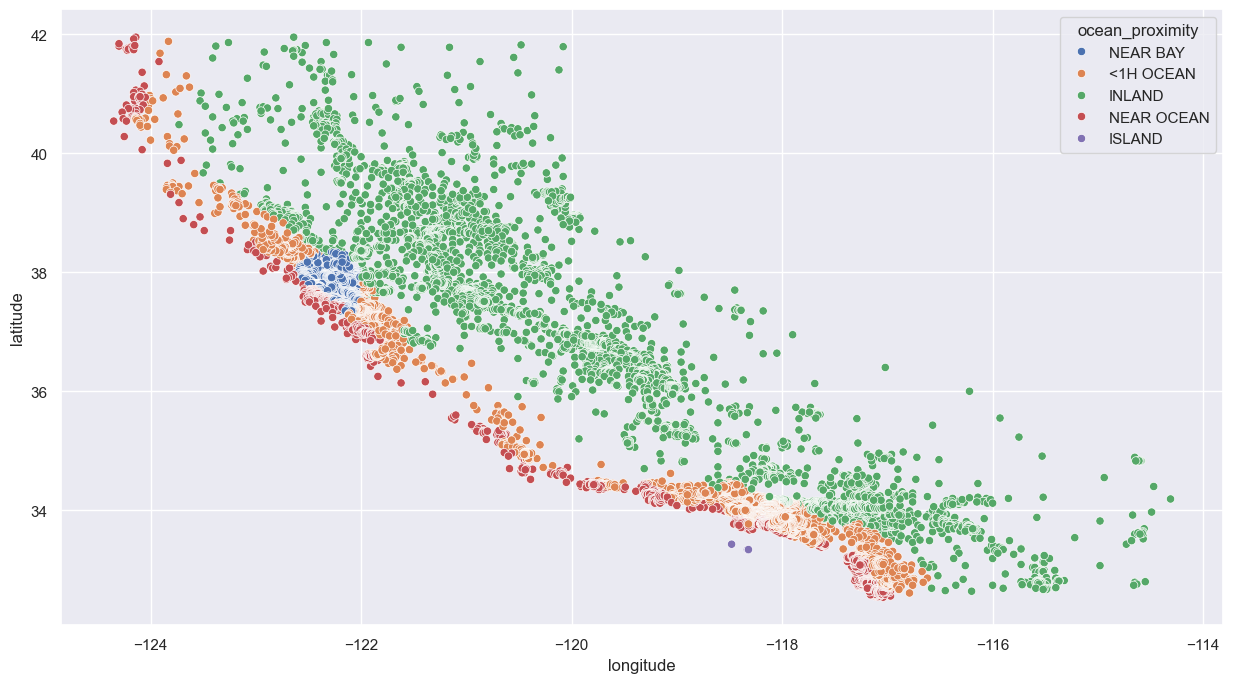

In [155]:
sb.scatterplot(x='longitude', y='latitude', data=df, hue='ocean_proximity')

| Mapa de California | Gráfica de California |
|:------------------:|:---------------------:|
| <img src="California.png" width="900"> | <img src="CaliforniaGraph.png" width="900"> |


<Axes: xlabel='longitude', ylabel='latitude'>

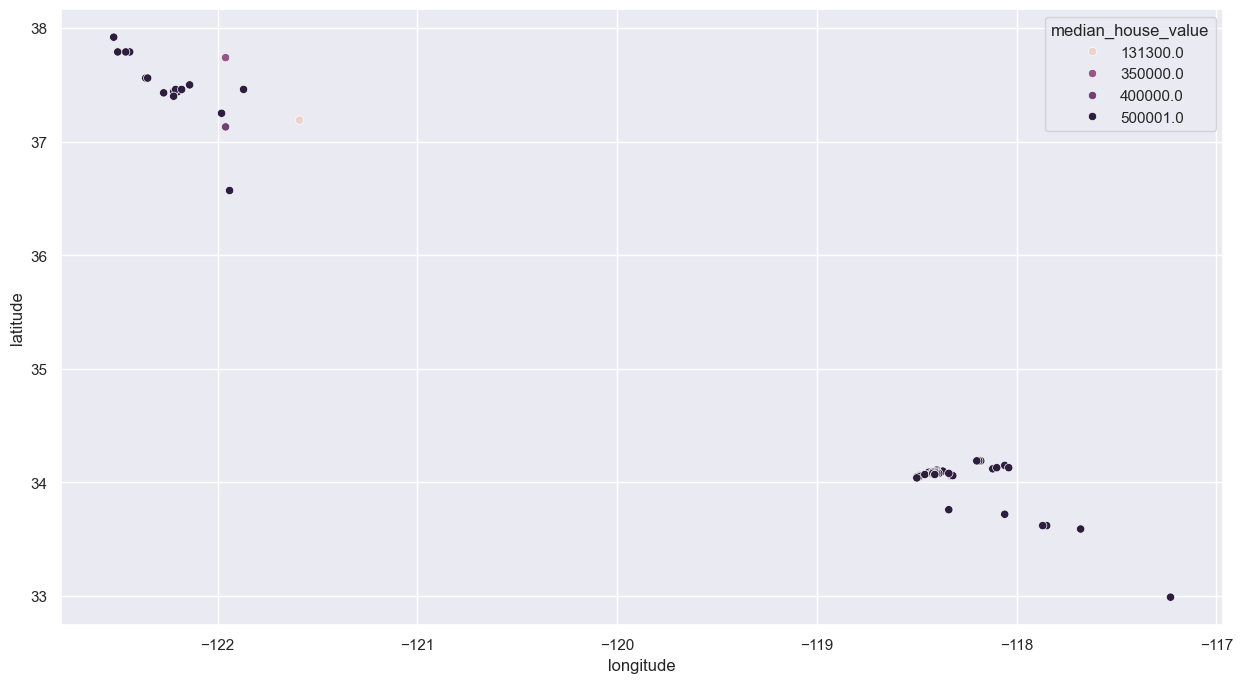

In [156]:
sb.scatterplot(x='longitude', y='latitude', data=df[(df.median_income > 14)], hue='median_house_value')

In [157]:
df = df.dropna()

In [158]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [159]:
# use dummy variables to convert categorical data to numerical

dummies = pd.get_dummies(df['ocean_proximity'], dtype=int)

In [160]:
df = df.join(dummies).drop('ocean_proximity', axis=1)

In [161]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

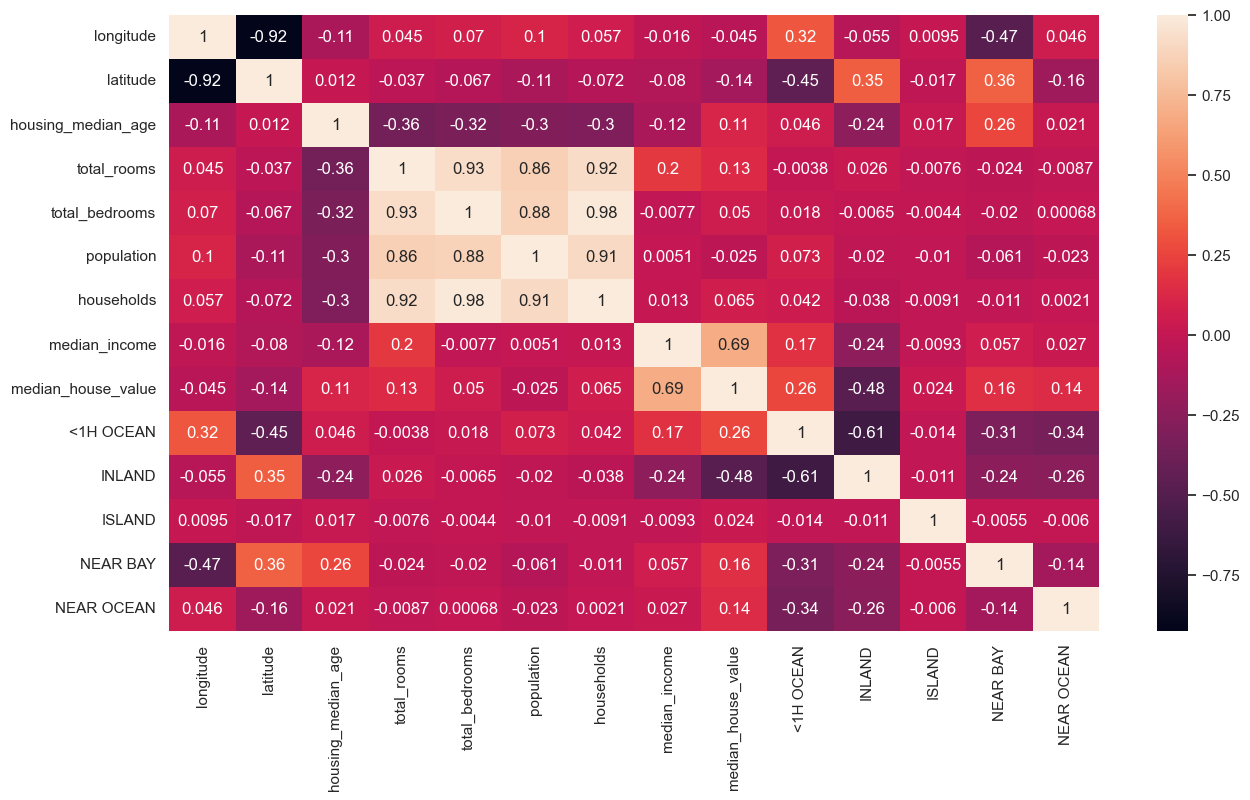

In [162]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(df.corr(), annot=True)

In [163]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

In [164]:
df.corr()['total_rooms'].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.930380
households            0.918992
population            0.857281
median_income         0.197882
median_house_value    0.133294
longitude             0.045480
INLAND                0.026477
<1H OCEAN            -0.003777
ISLAND               -0.007603
NEAR OCEAN           -0.008674
NEAR BAY             -0.023647
latitude             -0.036667
housing_median_age   -0.360628
Name: total_rooms, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

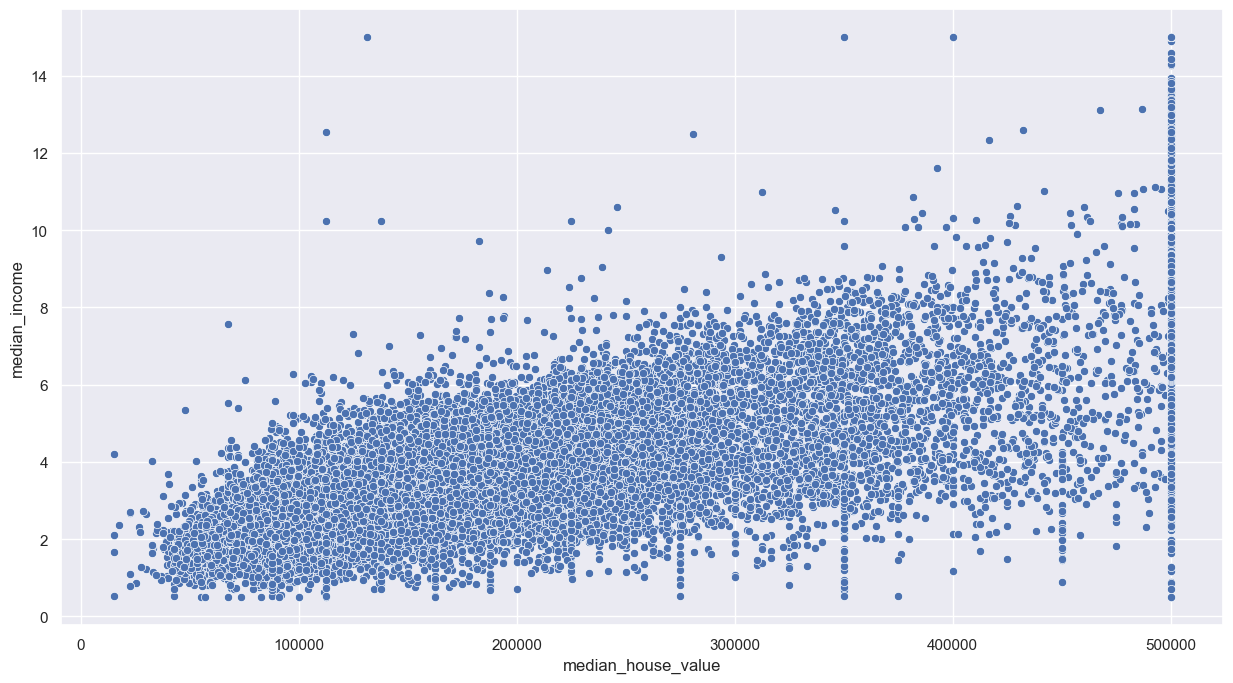

In [165]:
sb.scatterplot(x=df['median_house_value'], y=df['median_income'])

In [166]:
df['bedrom_ratio'] = df['total_bedrooms'] / df['total_rooms']

<Axes: >

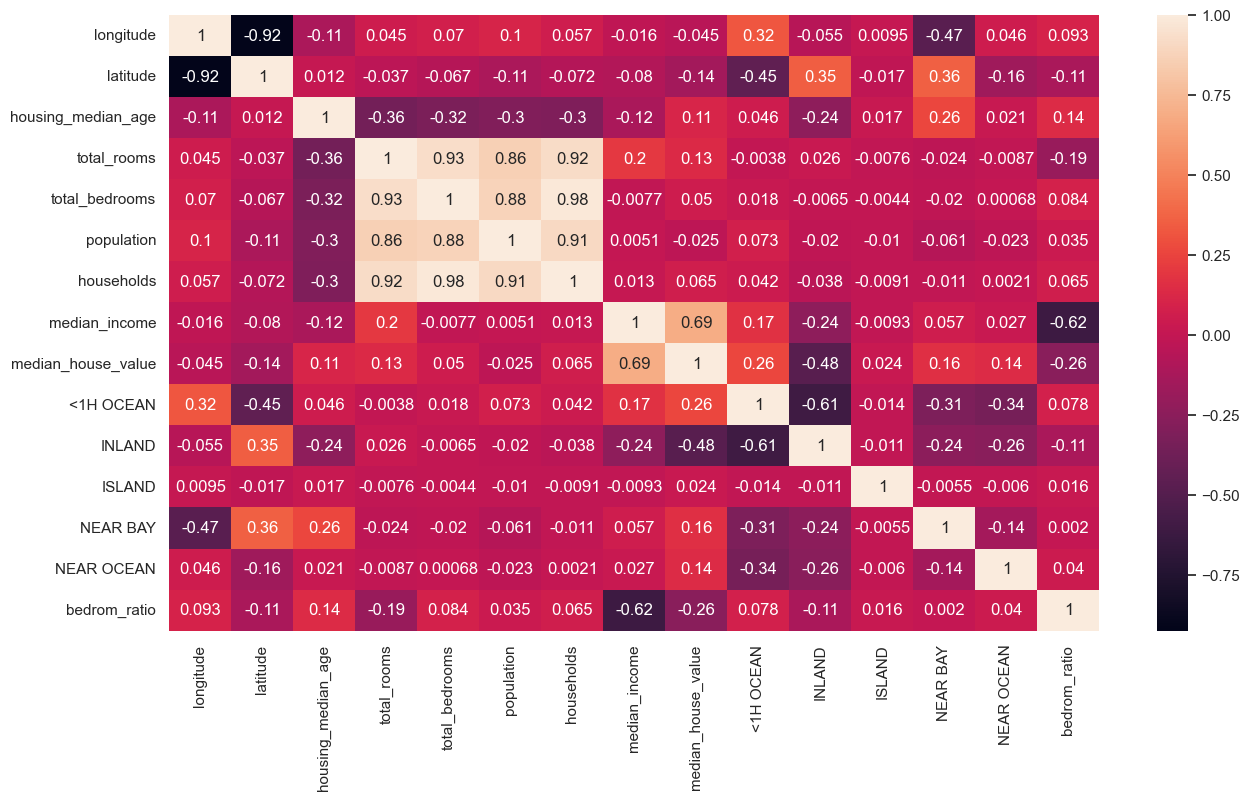

In [167]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(df.corr(), annot=True)

In [168]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [169]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [170]:
model = LinearRegression()

In [171]:
model.fit(x_train, y_train)

LinearRegression()

In [172]:
predictions = model.predict(x_test)

In [173]:
compare = {
    'prediction': predictions,
    'real': y_test
}
pd.DataFrame(compare)

,prediction,real
19341,193297.697383,160000.0
20622,67772.581345,67000.0
10299,289014.868609,272400.0
1534,236543.653188,310600.0
5382,258535.728433,327300.0
...,...,...
13561,248046.311821,159700.0
4042,606906.036736,500001.0
16697,200280.257080,160000.0
2187,51915.370400,71800.0


In [174]:

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6517761116729
0.6519732983993498


In [175]:
#Error
mse = mean_squared_error(y_test, predictions)

In [176]:
mse

4823603154.984463

In [177]:
squered_error = np.sqrt(mse)

In [178]:
squered_error

69452.1645089947

In [179]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [180]:
x_train_scale

array([[-1.36094002,  1.01243854,  1.85807121, ...,  2.83870828,
        -0.38303643,  0.08435106],
       [ 0.87948988, -0.90305156, -1.56203725, ..., -0.3522729 ,
        -0.38303643, -0.56909843],
       [ 0.56442943, -0.80001786,  1.14223456, ..., -0.3522729 ,
        -0.38303643,  0.3038926 ],
       ...,
       [ 0.94450235, -0.9264683 , -1.00527541, ..., -0.3522729 ,
        -0.38303643, -0.4942361 ],
       [ 0.80947645, -0.92178495, -0.36897616, ..., -0.3522729 ,
        -0.38303643,  1.24681101],
       [ 0.64944574, -0.75318436,  0.26732309, ..., -0.3522729 ,
        -0.38303643,  1.19257765]])